# Project Visualizing Real World Data 

The goal of this project was to practice interpreting different types of visualizations by collecting relevant information about players from the portuguese professional league during the year of 2019 in order to compare their attributes and analyse the differences between the teams.


## Before your start:

- Read the README.md file
- Follow each step as described in the instructions
- Enjoy the ride!

### 1. Importing Libraries

In [19]:
# Start by importing the table and the necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [20]:
# Import the dataset that is going to be analyzed and set the dataframe options to display all columns

data = pd.read_csv('players.csv')
pd.options.display.max_columns = None

### 2. FIFA19 dataset
#### 2.1 Exploring the dataset

- Before any changes are made, it's important to get a grasp of the dataset's characteristics

In [21]:
data.shape

(18207, 89)

In [22]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [23]:
data.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

#### 2.2 Data Cleaning

- Given the purpose of the project, it's usefull to clean columns that are not relevant for the analysis


In [25]:

cols = ['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position']

data = data.drop(cols, axis =1)

- Next, we'll be reformatting a few columns to numerical values so we can use its values in the analysis

In [26]:
def numeric_value(x):
    amount = x.replace('€', '')
    
    # Changing the milions (M) for 1000000's
    if 'M' in amount:
        amount = amount.replace('M', '')
        amount = float(amount)*1000000

    # Changing the thousands (K) for 1000's
    elif 'K' in amount:
        amount = amount.replace('K', '')
        amount = float(amount)*1000
    return float(amount)

In [27]:
data['Clean_Value'] =  data['Value'].apply(numeric_value)

In [28]:
data['Clean_Wage'] =  data['Wage'].apply(numeric_value)

### 3. Data Analysis and Visualization

- For this project, we've selected all the teams from `Primeira Liga`:

- The Primeira Liga, also known as Liga NOS for sponsorship reasons, is the top professional association football division of the Portuguese football league system.

In [29]:
# This league was composed of 16 teams in 2019 and for the sake of the analysis we'll use 14 that are availabe
# Two clubs are not in the dataset (Gil Vicente FC and FC Famalicao)


clubs = ['FC Porto', 'SL Benfica', 'SC Braga', 'Sporting CP', 'Rio Ave FC', 'Vitória Guimarães', 
         'Moreirense FC', 'Santa Clara', 'Boavista FC', 'Vitória de Setúbal', 'Os Belenenses', 
         'CD Tondela', 'Portimonense SC', 'CD Aves']

primeira_liga = data[data['Club'].isin(clubs)]

#### 3.1 Average attributes per club in Primeira Liga

In [30]:
primeira_liga.groupby("Club").mean().round().sort_values('Overall', ascending = False)

,ID,Age,Overall,Potential,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Clean_Value,Clean_Wage
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC Porto,204937.0,25.0,77.0,81.0,16.0,56.0,56.0,61.0,68.0,54.0,67.0,58.0,46.0,60.0,68.0,71.0,70.0,69.0,74.0,64.0,65.0,71.0,70.0,68.0,57.0,65.0,52.0,62.0,63.0,55.0,71.0,56.0,52.0,47.0,17.0,16.0,16.0,17.0,18.0,11985714.0,14643.0
SL Benfica,212760.0,24.0,77.0,82.0,24.0,58.0,54.0,63.0,68.0,52.0,66.0,60.0,54.0,63.0,69.0,69.0,69.0,68.0,75.0,65.0,67.0,70.0,72.0,69.0,57.0,67.0,59.0,60.0,64.0,57.0,70.0,54.0,58.0,54.0,18.0,17.0,16.0,17.0,18.0,11401786.0,12036.0
Sporting CP,203078.0,26.0,76.0,79.0,28.0,56.0,53.0,59.0,68.0,55.0,64.0,59.0,49.0,62.0,66.0,66.0,67.0,66.0,73.0,62.0,65.0,67.0,70.0,71.0,60.0,65.0,56.0,59.0,66.0,56.0,70.0,57.0,56.0,51.0,20.0,20.0,18.0,19.0,19.0,9974167.0,14867.0
SC Braga,220712.0,25.0,75.0,79.0,25.0,55.0,51.0,60.0,65.0,51.0,63.0,55.0,48.0,58.0,66.0,64.0,65.0,65.0,73.0,63.0,65.0,67.0,67.0,68.0,57.0,63.0,55.0,57.0,59.0,55.0,69.0,52.0,56.0,53.0,18.0,17.0,16.0,17.0,17.0,7350893.0,12500.0
Vitória Guimarães,218012.0,25.0,72.0,77.0,29.0,55.0,48.0,55.0,64.0,45.0,63.0,53.0,45.0,56.0,66.0,68.0,67.0,66.0,70.0,64.0,61.0,68.0,63.0,68.0,50.0,60.0,48.0,56.0,57.0,49.0,66.0,48.0,48.0,45.0,18.0,17.0,17.0,18.0,16.0,4479167.0,7267.0
Boavista FC,217337.0,26.0,69.0,72.0,25.0,48.0,47.0,55.0,60.0,47.0,56.0,51.0,46.0,51.0,60.0,63.0,63.0,63.0,65.0,62.0,61.0,67.0,63.0,67.0,50.0,58.0,44.0,51.0,51.0,52.0,59.0,50.0,47.0,44.0,17.0,18.0,17.0,17.0,18.0,1508889.0,4148.0
Moreirense FC,220670.0,25.0,69.0,73.0,28.0,51.0,47.0,54.0,60.0,46.0,57.0,52.0,46.0,53.0,60.0,61.0,63.0,62.0,67.0,63.0,59.0,66.0,64.0,66.0,48.0,60.0,48.0,51.0,55.0,50.0,61.0,44.0,49.0,44.0,17.0,17.0,17.0,16.0,17.0,1900000.0,3880.0
Portimonense SC,219587.0,24.0,69.0,75.0,19.0,51.0,48.0,54.0,65.0,46.0,59.0,51.0,43.0,56.0,63.0,66.0,66.0,66.0,66.0,66.0,61.0,65.0,68.0,64.0,49.0,57.0,50.0,51.0,52.0,51.0,63.0,44.0,51.0,48.0,14.0,15.0,14.0,14.0,14.0,2686111.0,5370.0
Rio Ave FC,218019.0,24.0,69.0,75.0,26.0,52.0,47.0,55.0,60.0,48.0,62.0,52.0,44.0,48.0,62.0,64.0,64.0,63.0,67.0,63.0,60.0,62.0,61.0,66.0,48.0,56.0,44.0,55.0,54.0,53.0,62.0,43.0,46.0,45.0,18.0,16.0,16.0,17.0,17.0,2348750.0,5929.0


#### 3.2 Distribution of overall rating in Primeira Liga

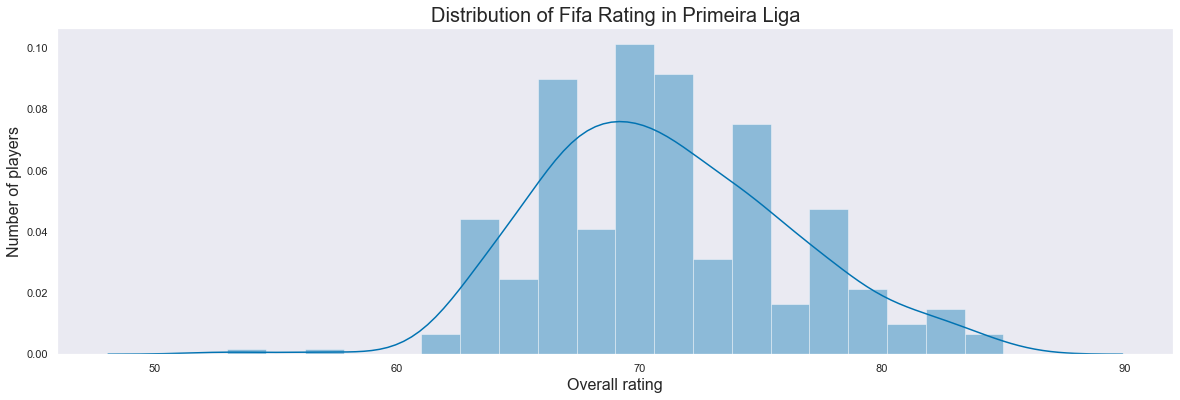

In [31]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = primeira_liga.Overall
plt.figure(figsize=(20,6))
ax = sns.distplot(x, bins = 20, kde = True, color='b')
ax.set_xlabel(xlabel="Overall rating", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of Fifa Rating in Primeira Liga', fontsize=20)
plt.show()

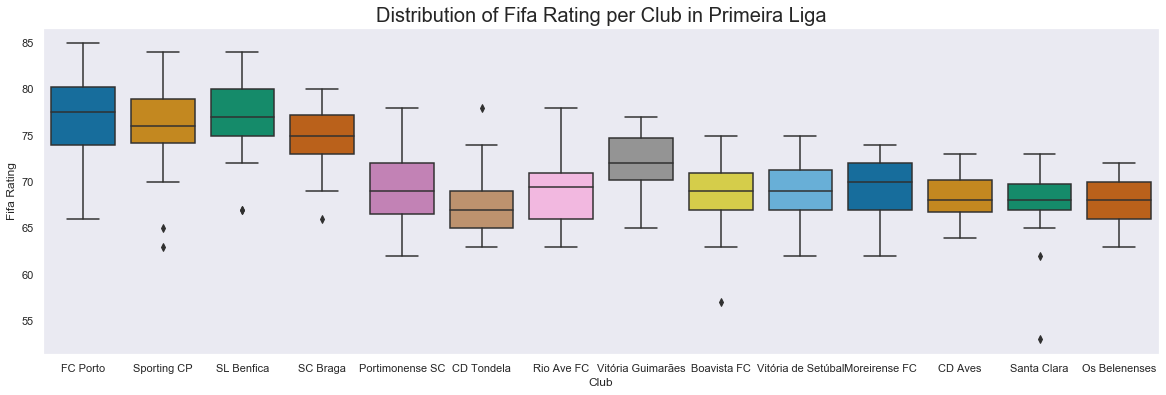

In [32]:
plt.rcParams['figure.figsize'] = (20, 6)
ax = sns.boxplot(x = primeira_liga['Club'], y = primeira_liga['Overall'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Club', fontsize = 12)
ax.set_ylabel(ylabel = 'Fifa Rating', fontsize = 12)
ax.set_title(label = 'Distribution of Fifa Rating per Club in Primeira Liga', fontsize = 20)
plt.show()

#### 3.3 Distribution of age in Primeira Liga

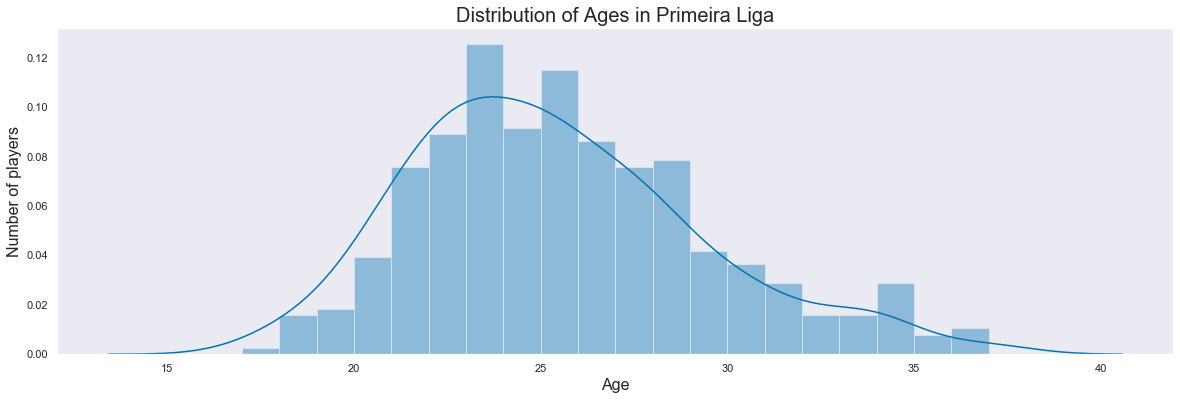

In [33]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = primeira_liga.Age
plt.figure(figsize=(20,6))
ax = sns.distplot(x, bins = 20, kde = True, color='b')
ax.set_xlabel(xlabel="Age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of Ages in Primeira Liga', fontsize=20)
plt.show()

#### 3.3 Distribution of age in Primeira Liga

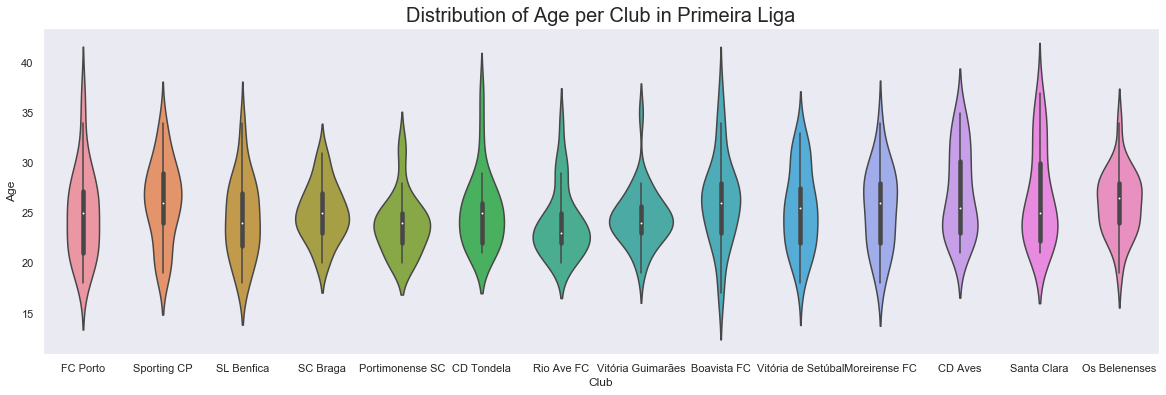

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
ax = sns.violinplot(x="Club", y="Age", data=primeira_liga);
ax.set_title(label='Distribution of Age per Club in Primeira Liga', fontsize=20);

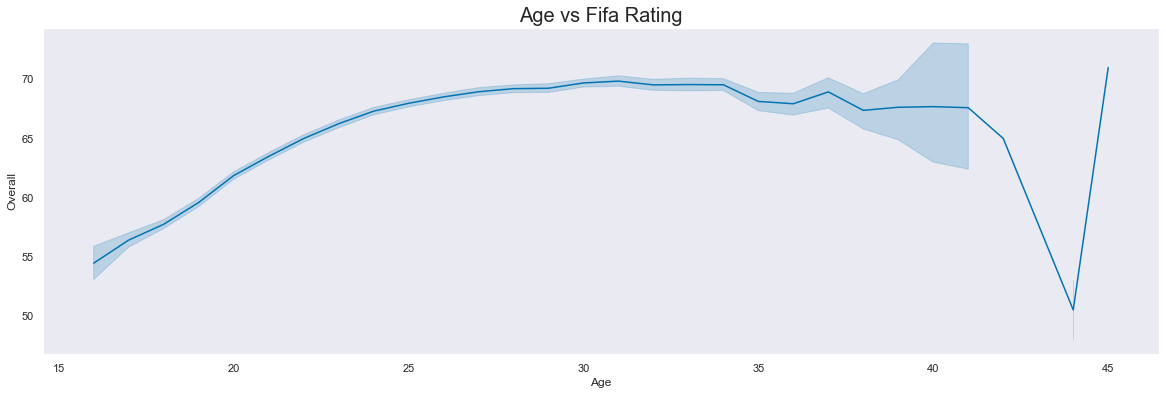

In [35]:
sns.lineplot(data['Age'], data['Overall'])
plt.title('Age vs Fifa Rating', fontsize = 20)
plt.show()

#### 3.4  Fifa Rating visual correlation with other variables

In [36]:
# Creating the dataset and generating the plot
trace = go.Scatter(x = primeira_liga['Clean_Wage']/100000,
                   y = primeira_liga['Overall'],
                   mode = 'markers',
                   marker = dict(color = 'olive'))
    
# Layout for regression plot
title = 'Player Wage vs Fifa Rating'
layout = go.Layout(title = title, xaxis =dict(title = 'Player Wage (in K€)'), yaxis = dict(title = 'Fifa Rating'))
    
fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

In [37]:
# Creating the dataset and generating the plot
trace = go.Scatter(x = primeira_liga['Jersey Number'],
                   y = primeira_liga['Overall'],
                   mode = 'markers',
                   marker = dict(color = 'olive'))
    
# Layout for regression plot
title = 'Jersey Number vs Fifa Rating'
layout = go.Layout(title = title, xaxis =dict(title = 'Jersey Number'), yaxis = dict(title = 'Fifa Rating'))
    
fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

In [39]:
fifa_primeira = pd.DataFrame(primeira_liga.groupby('Nationality')['Overall'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = fifa_primeira['Nationality'],
            text = fifa_primeira['Nationality'],
            z = fifa_primeira['Overall'],)]

layout = go.Layout(title = 'Fifa Rating vs Country of Origin in Primeira Liga')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)